In [2]:
# gini index calcuation 
#G=summation of P(j/k)*(1-P(j/k))

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load example dataset (Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Calculate Gini impurity
gini_impurity = clf.tree_.impurity[0]
print("Gini impurity:", gini_impurity)



Gini impurity: 0.6666666666666667


In [3]:
#gini index for 2 item 

#0.4212648022171831
# 0.0
# 0.4954648526077098
# 0.07420005039052668
# 0.06802138658249718
k=.30159
j=.69841

gini0=2*j*k 
print(gini0)

k2=21/21
j2=1-k2
p2=.3333

gini2=2*j2*k2 
print(gini2)

k3=.45238
j3=1-k3
p3=.66667


gini3=2*j3*k3
print(gini3)



# differnece in gini coefficient 
ginidiff= gini0-gini2*p2-gini3*p3
print(ginidiff)

0.4212669438
0.0
0.4954646712
0.09095551145109604


In [4]:
# entropy calculation 
from scipy.stats import entropy

# Define probabilities of events (as a list or array)
probabilities = [0.30159,0.69841]

# Calculate entropy
entropy_value = entropy(probabilities, base=2)  # base=2 for binary entropy
print("Entropy:", entropy_value)

Entropy: 0.8832258279230543


In [5]:
# Classification problems are an important category of problems in analytics in which the outcome variable or response variable (Y) takes discrete values. The primary objective of a classification model is to predict the probability of an observation belonging to a class, known as class probability. 

# Classification problems may have binary or multiple outcomes or classes. Binary outcomes are called binary classification and multiple outcomes are called multinomial classification. There are several techniques used for solving classification problems such as logistic regression, classification trees, discriminant analysis, neural networks, and support vector machines.

# Binary Logistic Regression: 

# Logistic regression is a statistical model in which the response variable takes a discrete value and the explanatory variables can either be continuous or discrete. If the outcome variable takes only two values, then the model is called the binary logistic regression model.

# The logistic function has an S-shaped curve (thus also known as the Sigmoid function

import pandas as pd 
df=pd.read_csv("../../inputdata/German_Credit_Data.csv")
#df.info()

xfeature=list(df.columns)
xfeature.remove("status")
# print("printing xfeatures")
# print(xfeature)
creditsdf= pd.get_dummies(df[xfeature],drop_first=True)
print("creditsdf:")
print(creditsdf)
# dfbank=pd.read_csv("../inputdata/bank.csv")
# dfbank.head(5)




creditsdf:
     duration  amount  inst_rate  residing_since  age  num_credits  \
0           6    1169          4               4   67            2   
1          48    5951          2               2   22            1   
2          12    2096          2               3   49            1   
3          42    7882          2               4   45            1   
4          24    4870          3               4   53            2   
..        ...     ...        ...             ...  ...          ...   
995        12    1736          3               4   31            1   
996        30    3857          4               4   40            1   
997        12     804          4               4   38            1   
998        45    1845          4               4   23            1   
999        45    4576          3               4   27            1   

     checkin_acc_A12  checkin_acc_A13  checkin_acc_A14  credit_history_A31  \
0              False            False            False               F

In [6]:
import statsmodels.api as sm
import numpy as np
Y =df.status
X=sm.add_constant(creditsdf)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.3,random_state=42)




In [7]:
#pd.Series[X_train]
logit_model=sm.Logit(Y_train,X_train.astype(float),check_rank=False).fit()
#logit_model.summary2()
print(logit_model.pvalues)

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6
const                    8.941041e-01
duration                 4.629398e-02
amount                   1.747666e-02
inst_rate                1.881840e-03
residing_since           2.932187e-01
age                      2.689338e-02
num_credits              1.821379e-01
checkin_acc_A12          8.434601e-02
checkin_acc_A13          3.690689e-02
checkin_acc_A14          5.388728e-10
credit_history_A31       7.915563e-01
credit_history_A32       2.608192e-01
credit_history_A33       7.700423e-02
credit_history_A34       1.814378e-03
savings_acc_A62          8.771991e-01
savings_acc_A63          1.682236e-01
savings_acc_A64          6.520330e-02
savings_acc_A65          2.724103e-02
present_emp_since_A72    8.563770e-01
present_emp_since_A73    9.398950e-01
present_emp_since_A74    4.289448e-01
present_emp_since_A75    5.672866e-01
personal_status_A92      9.886719e-01
personal_status_A93     

In [8]:
# The model object logit_model has summary2() method, which provides details of the model, its parameters, and results of all necessary statistical tests. The model summary contains important information to validate the model.

# Model Diagnostics:

# It is important to validate the logistic regression model to ensure its validity and goodness of fit before it can be used for practical applications.

# The  measures are used to validate a logistic regression model:

# 1. Wald’s test (a Chi-square test) for checking the statistical significance of individual predictor (feature) variables. This is equivalent to a t-test in the MLR (Multiple Linear Regression) model.

# 2. Likelihood ratio test for checking the statistical significance of the overall model (LLR p-value is reported in the output). The likelihood ratio test is also used for variable (feature) selection.

# 3. Pseudo R2: It is a measure of the goodness of the model. It is called pseudo R2 because it does not have the same interpretation of R2 as in the MLR model.
import pandas as pd

def  getsignificantvar(lm,significancevalue=.05):
     dfofvalues=pd.DataFrame(lm.pvalues)
     dfofvalues['vars']=dfofvalues.index
     dfofvalues.columns=['pvalue','vars']
     df=dfofvalues[dfofvalues.pvalue <=.05]['vars']
     return df
    
significatnvalues=list(getsignificantvar(logit_model))

In [9]:
final_logit =sm.Logit(Y_train,sm.add_constant(X_train[significatnvalues]).astype(float)).fit()
final_logit.summary2()
y_pred=pd.DataFrame({'actual':Y_test,'pred_prob':final_logit.predict(sm.add_constant(X_test[significatnvalues].astype(float)))})
y_pred['predicted']=y_pred['pred_prob'].map(lambda x:1 if x>.5 else 0)
print(y_pred)

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6
     actual  pred_prob  predicted
521       1   0.452449          0
737       0   0.491820          0
740       0   0.418416          0
660       0   0.270285          0
411       0   0.132119          0
..      ...        ...        ...
468       0   0.178787          0
935       1   0.587925          1
428       0   0.091998          0
7         0   0.571859          1
155       1   0.399631          0

[300 rows x 3 columns]


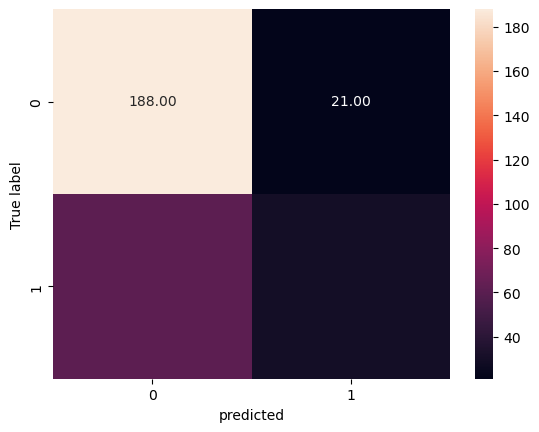

In [10]:
# A confusion matrix (also known as error matrix or classification table) is a matrix formed by checking the actual values and predicted values of observations in the dataset. To create a confusion matrix, first import matplotlib.pyplot and seaborn libraries to render all plots and charts.

# sklearn.metric module provides a method to build a confusion matrix if actual and predicted values are passed as inputs parameters. For better understanding, this matrix can be plotted as a heatmap. seaborn’s heatmap function can render the confusion matrix for easier interpretation. Define a method draw_cm() that takes actual and predicted values, creates the confusion matrix and draws the heatmap.

# In the confusion matrix, the columns represent the predicted label (class), while the rows represent the actual label (class). 

# The left-top quadrant represents actual bad credit and is correctly classified as bad credit. This is called True Positives (TP).
# The left-down quadrant represents actual good credit and is incorrectly classified as bad credit. This is called False Positives (FP).
# The right-top quadrant represents actual bad credit and is incorrectly classified as good credit. This is called False Negatives (FN).
# The right-down quadrant represents actual good credit and is correctly classified as good credit. This is called True Negatives (TN).
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

def drawcm(acutal,predicted):
    cm =metrics.confusion_matrix(y_true=acutal,y_pred= predicted)
    sn.heatmap(cm,annot=True, fmt='.2f')
    plt.ylabel("True label")
    plt.xlabel("predicted")
    plt.show()

drawcm(y_pred['actual'], y_pred['predicted'])


classisfication report
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_54103/1745795234.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(y_pred[y_pred['actual']==1]['pred_prob'],color='red',kde=False, label="Bad credit")
/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_54103/1745795234.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

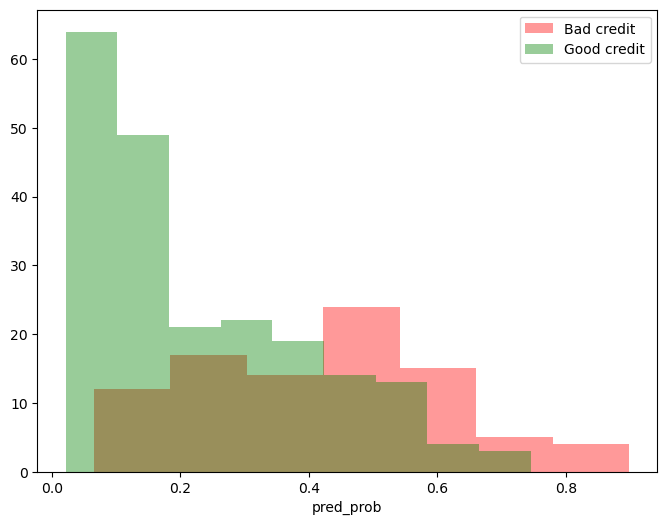

/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_54103/1745795234.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(y_pred[y_pred['actual']==1]['pred_prob'],color='red',kde=True,hist=False ,label="Bad credit")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_54103/1745795234.py:31: UserWarning: 

`distplot` is a deprecated function and will be remo

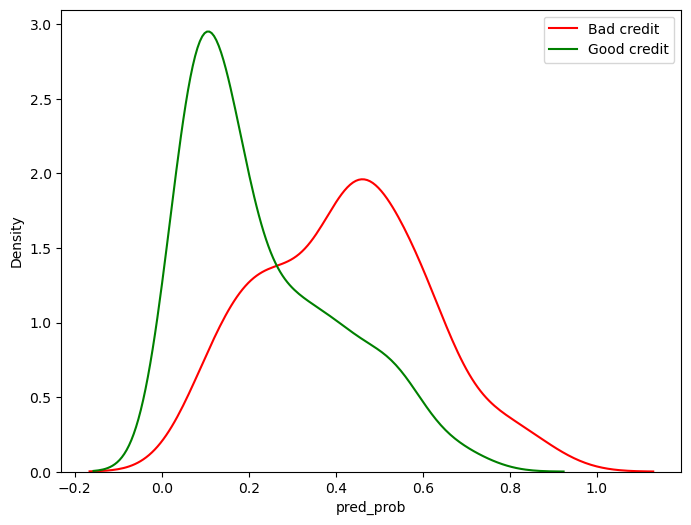

In [11]:
# In classification, the model performance is often measured using concepts such as sensitivity, specificity, precision, and F-score. The ability of the model to correctly classify positives and negatives is called sensitivity (also known as recall or true positive rate) and specificity (also known as true negative rate), respectively. The terminologies sensitivity and specificity originated in medical diagnostics.

# Sensitivity or Recall (True Positive Rate)

# Sensitivity is the conditional probability that the predicted class is positive given that the actual class is positive.

# Specificity (True Negative Rate)

# Specificity is the conditional probability that the predicted class is negative given that the actual class is negative. 

# Precision

# Precision is the conditional probability that the actual value is positive given that the prediction by the model is positive.

# F-Score

# F-Score is a measure that combines precision and recall (harmonic mean between precision and recall). 

print('classisfication report')
print(metrics.classification_report(y_pred['actual'], y_pred['predicted']))

plt.figure(figsize=(8,6))
sn.distplot(y_pred[y_pred['actual']==1]['pred_prob'],color='red',kde=False, label="Bad credit")
sn.distplot(y_pred[y_pred['actual']==0]['pred_prob'],color='green',kde=False, label="Good credit")
plt.legend()
plt.show()

metrics.classification_report(y_pred['actual'], y_pred['predicted'])
plt.figure(figsize=(8,6))
sn.distplot(y_pred[y_pred['actual']==1]['pred_prob'],color='red',kde=True,hist=False ,label="Bad credit")
sn.distplot(y_pred[y_pred['actual']==0]['pred_prob'],color='green',kde=True,hist=False , label="Good credit")
plt.legend()
plt.show()

# a large overlap reagion between red and green means model is indecisive


In [12]:
# Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)

# Receiver operating characteristic (ROC) curve can be used to understand the overall performance (worth) of a logistic regression model (and, in general, of classification models) and used for model selection. The term has its origin in electrical engineering when electrical signals were used for predicting enemy objects (such as submarines and aircraft) during World War II. Given a random pair of positive and negative class records, ROC gives the proportions of such pairs that will be correctly classified. ROC curve is a plot between sensitivity (true positive rate) on the vertical axis and 1 – specificity (false positive rate) on the horizontal axis. We will write a method draw_roc() which takes the actual classes and predicted probability values and then draws the ROC curve. 

# metrics.roc_curve() returns different threshold (cut-off) values and their corresponding false positive and true positive rates. Then these values can be taken and plotted to create the ROC curve. metrics. roc_auc_score() returns the area under the curve (AUC).

metrics.roc_curve(y_pred['actual'], y_pred['predicted'])

metrics.roc_auc_score(y_pred['actual'], y_pred['predicted'])

0.614595930385404

In [13]:
# While using the logistic regression model, one of the decisions that a data scientist has to make is to choose the right classification cut-off probability (Pc ). The overall accuracy, sensitivity, and specificity will depend on the chosen cut-off probability. The following two methods are used for selecting the cut-off probability:

# 1. Youden’s index

# 2. Cost-based approach

# Youden’s Index

# Sensitivity and specificity change when we change the cut-off probability. Youden’s index (Youden, 1950) is a classification cut-off probability for which the following function is maximized:

# Youden’s Index = J-Statistic = p Max [Sensitivity (p) + Specificity (p) – 1]

# We already know that sensitivity is also known as True Positive Rate (TPR) and specificity is known as True Negative Rate (TNR). That is, select the cut-off probability for which (TPR + TNR – 1) is maximum.  
# Cost-Based Approach

# As the cost of false negatives and false positives is not the same, the optimal cut-off classification can also be determined using the cost-based approach, which finds the cut-off where the total cost is minimum. In the cost-based approach, we assign penalty cost for misclassification of positives and negatives and find the total cost for a cut-off probability. Assuming the cost of a false positive is C1 and that of a false negative is C2, the total cost will be

# Total cost = FN * C1 + FP * C2

# The optimal cut-off probability is the one that minimizes the total penalty cost. We will write a method get_total_cost() to return the penalty cost for a specific cut-off probability. The method also takes the relative cost of false negatives and false positives. The function will take actual and predicted values, find the number of false positives (FPs) and false negatives (FNs), and return the total cost.

SyntaxError: invalid syntax (983769990.py, line 1)